In [1]:
import os
import sys
import pandas as pd
import numpy as np
import math
import statsmodels.api as sm
from scipy import stats
import seaborn
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import re
import xlrd
import pathlib
from more_itertools import unique_everseen
from sklearn import linear_model, cross_validation, model_selection
from sklearn.metrics import *
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.cross_decomposition import PLSRegression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
root = pathlib.Path(os.path.join(os.path.join(os.path.expanduser('~')), 'Desktop') + "/SearchTool_Matches/")
cortdf = pd.read_excel(open(root / 'Cortisol/Cortisol_Analysis.xlsx',"rb"), index_col=False)
cortdf['Log Mean (µg/dL)'] = [math.log(y,10) for y in cortdf['Mean (µg/dL)']]
cortsubslist = list(unique_everseen(cortdf['Record ID'].astype(int)))
cortsubslist.sort()

In [14]:
msceitlisttemp = [root / 'MSCEIT/' / x for x in os.listdir(root / 'MSCEIT/') if any("PREEMPT1_%04d" % y in x for y in cortsubslist)]
eqilisttemp = [root / 'EQI2/' / x for x in os.listdir(root / 'EQI2/') if any("PREEMPT1_%04d" % y in x for y in cortsubslist)]
templist = [msceitlisttemp, eqilisttemp]
assessmentpathlist = []

for i, x in enumerate(templist):
    assessmentpathlist.append([])
    for y in cortsubslist:
        for z in x:
            if ("%04d" % y) in z.name:
                assessmentpathlist[i].append([y, z])

msceittotallist = []
msceitexparealist = []
msceitstratarealist = []
msceitpercbranchlist = []
msceitusingbranchlist = []
msceitunderbranchlist = []
msceitmanagebranchlist = []
eqitotallist = []; eqisplist = []; eqisrlist = []; eqisalist = []; eqieslist = []; eqiselist = []; eqieelist = []; eqiaslist = []; eqiinlist = []; eqiislist = []; eqiirlist = []; eqiemlist = []; eqirelist = []; eqidmlist = []; eqipslist = []; eqirtlist = []; eqiiclist = []; eqiiclist = []; eqismlist = []; eqifllist = []; eqistlist = []; eqioplist = []; eqihalist = []
age = []; gender = []
deletelist = []

deletelist.append([])
for i, x in enumerate(assessmentpathlist[0]):
    try:
        wb = xlrd.open_workbook(x[1], logfile=open(os.devnull, 'w')) 
        temp = pd.read_excel(wb, sheet_name='MSCEIT_Demographic_and_Scores', engine='xlrd')
        msceittotallist.append([x[0], temp['SS_TOT'][0]]) #0
        msceitexparealist.append([x[0], temp['SS_EXP'][0]]) #1
        msceitstratarealist.append([x[0], temp['SS_REA'][0]]) #2
        msceitpercbranchlist.append([x[0], temp['SS_B1'][0]]) #3
        msceitusingbranchlist.append([x[0], temp['SS_B2'][0]]) #4
        msceitunderbranchlist.append([x[0], temp['SS_B3'][0]]) #5
        msceitmanagebranchlist.append([x[0], temp['SS_B4'][0]]) #6
        age.append([x[0], temp['Age'][0]])
        gender.append([x[0], temp['Gender'][0]])
    except:
        deletelist[0].append(i)
for x in deletelist[0]:
    assessmentpathlist[0].pop(x)
    print(x)
    
deletelist.append([])
for i, x in enumerate(assessmentpathlist[1]):
    try:
        wb = xlrd.open_workbook(x[1], logfile=open(os.devnull, 'w'))
        temp = pd.read_excel(wb, sheet_name='EQ_i_2.0_Scores', engine='xlrd')
        eqitotallist.append([x[0], temp['TOT_T'][0]]) #0
        eqisplist.append([x[0], temp['SP_T'][0]]) #1
        eqisrlist.append([x[0], temp['SR_T'][0]]) #2
        eqisalist.append([x[0], temp['SA_T'][0]]) #3
        eqieslist.append([x[0], temp['ES_T'][0]]) #4
        eqiselist.append([x[0], temp['SE_T'][0]]) #5
        eqieelist.append([x[0], temp['EE_T'][0]]) #6
        eqiaslist.append([x[0], temp['AS_T'][0]]) #7
        eqiinlist.append([x[0], temp['IN_T'][0]]) #8
        eqiislist.append([x[0], temp['IS_T'][0]]) #9
        eqiirlist.append([x[0], temp['IR_T'][0]]) #10
        eqiemlist.append([x[0], temp['EM_T'][0]]) #11
        eqirelist.append([x[0], temp['RE_T'][0]]) #12
        eqidmlist.append([x[0], temp['DM_T'][0]]) #13
        eqipslist.append([x[0], temp['PS_T'][0]]) #14
        eqirtlist.append([x[0], temp['RT_T'][0]]) #15
        eqiiclist.append([x[0], temp['IC_T'][0]]) #16
        eqismlist.append([x[0], temp['SM_T'][0]]) #17
        eqifllist.append([x[0], temp['FL_T'][0]]) #18
        eqistlist.append([x[0], temp['ST_T'][0]]) #19
        eqioplist.append([x[0], temp['OP_T'][0]]) #20
        eqihalist.append([x[0], temp['HA_T'][0]]) #21
    except:
        deletelist[1].append(i)
for x in deletelist[1]:
    assessmentpathlist[0].pop(x)

msceitlistlist = [msceittotallist, msceitexparealist, msceitstratarealist, msceitpercbranchlist, msceitusingbranchlist, msceitunderbranchlist, msceitmanagebranchlist]
eqilistlist = [eqitotallist,eqisplist,eqisrlist,eqisalist,eqieslist,eqiselist,eqieelist,eqiaslist,eqiinlist,eqiislist,eqiirlist,eqiemlist,eqirelist,eqidmlist,eqipslist,eqirtlist,eqiiclist,eqismlist,eqifllist,eqistlist,eqioplist,eqihalist]
other = [age, gender]



0


In [16]:
assessmentlist = [msceitlistlist,eqilistlist]
deletelist = []
for i, w in enumerate(assessmentlist): #for a specific assessment group
    deletelist.append([])
    for j, x in enumerate(w): #for a specific subscale of an assessment group i.e., msceitmanagebranchlist
        deletelist[i].append([])
        inddelete = []
        for k, z in enumerate([y[1] for y in x]): #for a score, not index, of a subject in the subscale list
            if ((z > np.mean([y[1] for y in x]) + 3*np.std([y[1] for y in x])) or z < np.mean([y[1] for y in x]) - 3*np.std([y[1] for y in x])):
                inddelete.append(k)
        deletelist[i][j] = inddelete
        for x in deletelist[i][j]:
            assessmentlist[i][j].pop(x)

In [58]:
cortpoint1dif = 8
cortpoint2dif = 9
assessmentcortpairs=[]
for i, assessmentgroup in enumerate(range(len(assessmentlist))):
    assessmentcortpairs.append([])
    for assessmentsubscale in range(len(assessmentlist[assessmentgroup])):
        logcortlist = []
        deletelist = []
        diftrierlist = []
        for i, x in enumerate(assessmentlist[assessmentgroup][assessmentsubscale]):
            logcortlist.append([x[0]])
            try:
                for y in [cortpoint1dif, cortpoint2dif]: 
                    logcortlist[i].append(cortdf.loc[(cortdf['Record ID'] == int(x[0])) & (cortdf['General Time'] == y), 'Log Mean (µg/dL)'].iloc[0])
            except:
                deletelist.append(i)
        assessmentvar = assessmentlist[assessmentgroup][assessmentsubscale]
        for x in deletelist:
            logcortlist.pop(x)
            assessmentvar.pop(x)
        diftrierlist = [i-j for i,j in zip([x[2] for x in logcortlist],[x[1] for x in logcortlist])]
        diftrierlistz = list(stats.mstats.zscore(diftrierlist))
        assessmentcortpairs[assessmentgroup].append([[x[0] for x in assessmentvar], [x[1] for x in assessmentvar], diftrierlist])
        
        

r = 0.21849047871916308, p = 0.14932447928684403


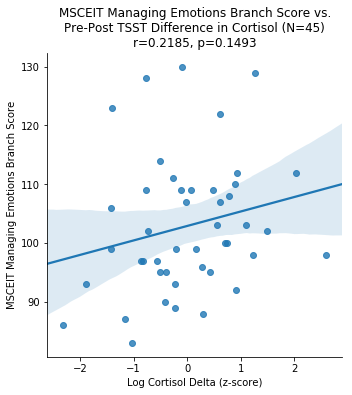

In [71]:
assessmentgroup = 1
assessmentsubscale = 9

#Edit These
SAVE = False
var1 = list(stats.mstats.zscore(assessmentcortpairs[assessmentgroup][assessmentsubscale][2]))
var2 = assessmentcortpairs[assessmentgroup][assessmentsubscale][1]
var1label = "Log Cortisol Delta (z-score)"
var2label = "MSCEIT Managing Emotions Branch Score"
title = "MSCEIT Managing Emotions Branch Score vs.\nPre-Post TSST Difference in Cortisol (N=%s)" % len(var1)
savename = "Analyses\\MSCEIT\\MSCEITManage-TSSTStress.pdf"

#--------------------------------------------
table = pd.DataFrame(
    {var1label: var1,
    var2label: var2
    })
for x in table.columns:
    table = table[np.isfinite(table[x])]

lm = seaborn.lmplot(x=var1label, y=var2label, palette=('r'), data=table, legend_out=False)
ax = plt.gca()
ax.set_title("%s\nr=%.4f, p=%.4f" % (title,pearsonr(table[var1label],table[var2label])[0],pearsonr(table[var1label],table[var2label])[1]))
print("r = %s, p = %s" % pearsonr(table[var1label],table[var2label]))
if SAVE == True:
    lm.savefig(root / savename, bbox_inches='tight')

In [59]:
chosenassessments = [0,1]



msceitcols = ['MSCEIT_TOT', 'MSCEIT_EXP', 'MSCEIT_STRAT', 'MSCEIT_PERC', 'MSCEIT_USE', 'MSCEIT_UNDER', 'MSCEIT_MANAGE']
eqicols = ['EQI_TOT', 'EQI_SP', 'EQI_SR', 'EQI_SA', 'EQI_ES', 'EQI_SE', 'EQI_EE', 'EQI_AS', 'EQI_IN', 'EQI_IS', 'EQI_IR', 'EQI_EM', 'EQI_RE', 'EQI_DM', 'EQI_PS', 'EQI_RT', 'EQI_IC', 'EQI_SM', 'EQI_FL', 'EQI_ST', 'EQI_OP', 'EQI_HA']
cols = [msceitcols, eqicols]
chosencols = []
for x in chosenassessments:
    chosencols = chosencols + cols[x]

regressionlist = assessmentcortpairs
ms = []
table = []
for mssubs in chosenassessments:
    ms = ms + [x[0] for x in assessmentcortpairs[mssubs]]
setlist = ms
intersectlist = list(set(setlist[0]).intersection(*setlist))
for h in chosenassessments:
    for i, y in enumerate([x[0] for x in assessmentcortpairs[h]]):
        for j, z in enumerate(y):
            if z not in intersectlist:
                for k, x in enumerate(regressionlist[h][i]):
                    regressionlist[h][i][k].pop(j)
    table = table + [x[1] for x in regressionlist[h]]
clf = linear_model.LinearRegression()
df = pd.DataFrame(table).T
df.columns = chosencols
for x in range(len(df.columns)):
    df.iloc[:,x] = list(stats.mstats.zscore(df.iloc[:,x]))

df.to_csv("msceiteqi.txt", sep='\t', index=False)

In [35]:
pca = PCA(n_components='mle')
pca.fit_transform(df)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents)
factorload = pd.DataFrame(pca.components_, columns=chosencols)
factorload.iloc[0,]
factorload



TypeError: unsupported operand type(s) for +: 'float' and 'str'

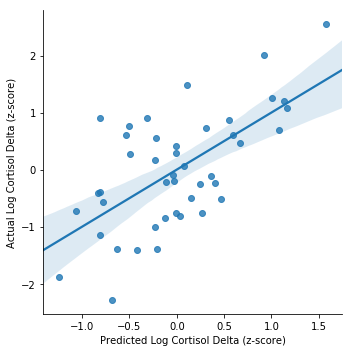

In [96]:
#.iloc[:,[0,4,5,8,12]]
#testingset = principalDf
#testingset = principalDf.iloc[:,[0,4,5,8,12,17,3,15,10]]
testingset = factordf
testingset = sm.add_constant(testingset)
target = list(stats.mstats.zscore(regressionlist[0][0][2]))
X_train, X_test , y_train, y_test = model_selection.train_test_split(testingset, target, test_size=0.2, random_state=1)
model = sm.OLS(target, testingset).fit()
predictions = model.predict(testingset)
model.summary()
#plt.scatter(target, model.predict(testingset))
#print("r = %f, p = %f" % pearsonr(target,model.predict(testingset)))
table = pd.DataFrame(
    {'Predicted Log Cortisol Delta (z-score)': model.predict(testingset),
    'Actual Log Cortisol Delta (z-score)': target
    })
lm = seaborn.lmplot(x='Predicted Log Cortisol Delta (z-score)', y='Actual Log Cortisol Delta (z-score)', palette=('r'), data=table, legend_out=False)


[1.0595287203555623, 1.0152115264672343, 1.0494084027953376, 1.0928690881730767, 1.1712188789973523, 1.119938741936788, 1.0766074608039777, 1.0916330882903424, 1.1452073767182531, 1.029281429272983, 1.1930155664136841, 1.2071531323251652, 1.2223776300804254, 1.1286778368727937, 1.2172039830012982, 1.2925795333145573, 1.3107317801668144, 1.396367591099396, 1.3748396097115634, 1.4904438238177538, 1.7665046817889443, 2.297805175365838, 2.342897512092076, 2.5096437257767863]


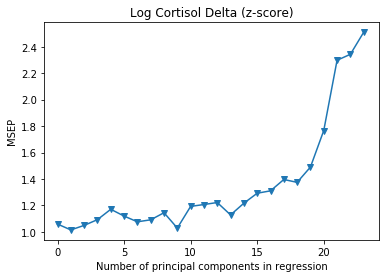

In [78]:
type = 'neg_mean_squared_error'
#type = 'r2'

n = len(principalComponents)
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)
lm = linear_model.LinearRegression()
msep=[]

score = -1*model_selection.cross_val_score(lm, np.ones((n,1)), target, cv=kf_10, scoring=type).mean()
msep.append(score)

for i in np.arange(1, 24):
    score = -1*model_selection.cross_val_score(lm, principalComponents[:,:i], target, cv=kf_10, scoring=type).mean()
    msep.append(score)
    
print(msep)
    
plt.plot(msep, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSEP')
plt.title('Log Cortisol Delta (z-score)')
plt.xlim(xmin=-1);

r = 0.29311811520464853, p = 0.05348278448271366


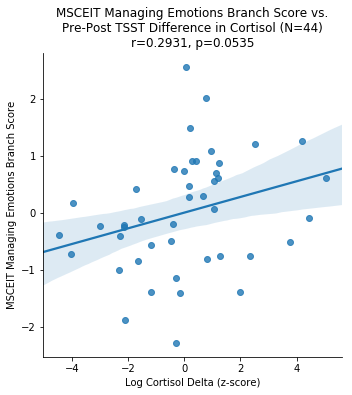

In [70]:
#Edit These
SAVE = False
var1 = f8
var2 = list(stats.mstats.zscore(regressionlist[0][0][2]))
var1label = "Log Cortisol Delta (z-score)"
var2label = "MSCEIT Managing Emotions Branch Score"
title = "MSCEIT Managing Emotions Branch Score vs.\nPre-Post TSST Difference in Cortisol (N=%s)" % len(var1)
savename = "Analyses\\MSCEIT\\MSCEITManage-TSSTStress.pdf"

#--------------------------------------------
table = pd.DataFrame(
    {var1label: var1,
    var2label: var2
    })
for x in table.columns:
    table = table[np.isfinite(table[x])]

lm = seaborn.lmplot(x=var1label, y=var2label, palette=('r'), data=table, legend_out=False)
ax = plt.gca()
ax.set_title("%s\nr=%.4f, p=%.4f" % (title,pearsonr(table[var1label],table[var2label])[0],pearsonr(table[var1label],table[var2label])[1]))
print("r = %s, p = %s" % pearsonr(table[var1label],table[var2label]))
if SAVE == True:
    lm.savefig(root / savename, bbox_inches='tight')

In [86]:
seaborn.residplot(target, model.predict(testingset), lowess=True)
ax = plt.gca()
ax.set_ylabel("Residuals")
ax.set_xlabel("Log Cortisol Delta (z-score)")

TypeError: only integer scalar arrays can be converted to a scalar index

In [99]:
cor_mat1 = np.corrcoef(testingset)
eig_vals, eig_vecs = np.linalg.eig(cor_mat1)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

for x in eig_vals:
    print("%f" % x)

Eigenvectors 
[[ 0.06823285+0.j         -0.1117195 +0.j         -0.11148469+0.j
  ...  0.08996046-0.05028703j -0.00871537+0.05376167j
  -0.00871537-0.05376167j]
 [-0.01135518+0.j          0.26352625+0.j         -0.06647456+0.j
  ... -0.11121747+0.05381197j -0.09469639-0.01545164j
  -0.09469639+0.01545164j]
 [-0.13639211+0.j          0.01364207+0.j          0.20755934+0.j
  ...  0.04589532-0.06832359j  0.05410594+0.00056739j
   0.05410594-0.00056739j]
 ...
 [-0.02928115+0.j         -0.11129463+0.j          0.00070727+0.j
  ... -0.05334072-0.17538924j -0.08158952+0.06527682j
  -0.08158952-0.06527682j]
 [ 0.08898749+0.j          0.22684625+0.j          0.0763332 +0.j
  ...  0.23266316+0.05971275j  0.27210407-0.01820488j
   0.27210407+0.01820488j]
 [ 0.16302534+0.j         -0.25624679+0.j          0.02418587+0.j
  ... -0.11439338+0.01998261j -0.03229118-0.03123701j
  -0.03229118+0.03123701j]]

Eigenvalues 
[ 1.18414167e+01+0.00000000e+00j  6.21037763e+00+0.00000000e+00j
  4.13856677e+00+0.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


In [40]:
f1 = 0.894*df['MSCEIT_TOT'] + 1.025*df['MSCEIT_STRAT'] + 0.953*df['MSCEIT_UNDER'] + 0.96*df['MSCEIT_MANAGE']
f2 = 0.954*df['MSCEIT_EXP'] + 0.778*df['MSCEIT_PERC'] + 0.615*df['MSCEIT_USE']
f3 = 0.973*df['EQI_TOT'] + 0.768*df['EQI_IR'] + 0.598*df['EQI_RT'] + 0.734*df['EQI_ST']
f4 = 0.957*df['EQI_SP'] + 0.805*df['EQI_SR'] + 0.848*df['EQI_SA'] + 0.8*df['EQI_HA']
f5 = 0.954*df['EQI_SE'] + 0.475*df['EQI_EE'] + 0.836*df['EQI_AS']
f6 = 0.732*df['EQI_IN'] + 0.956*df['EQI_DM'] + 0.921*df['EQI_PS'] + 0.766*df['EQI_IC']
f7 = 0.95*df['EQI_IS'] + 0.729*df['EQI_EM'] + 0.665*df['EQI_RE']
f8 = 0.91*df['EQI_SM'] + 0.588*df['EQI_FL'] + 0.884*df['EQI_OP']

In [89]:
#factordf = pd.concat([f1,f7], axis=1, ignore_index=True)
factordf = pd.concat([f1,f2,f3,f4,f5,f6,f7,f8], axis=1, ignore_index=True)